In [4]:
# ! pip install librosa

In [1]:
import pandas as pd
import numpy as np
import glob
import scipy
import matplotlib.pyplot as plt
import re
import os
import librosa
import IPython.display as ipd
import librosa.display
%matplotlib inline

In [2]:
POSSIBLE_LABELS = 'yes no up down left right on off stop go unknown silence'.split()
id2name = {i: name for i, name in enumerate(POSSIBLE_LABELS)}
name2id = {name: i for i, name in id2name.items()}

In [3]:
train_df = pd.read_pickle('train_df_nov29.pkl')

In [4]:
valid_df = pd.read_pickle('valid_df.pkl')

In [5]:
train_df.head()

,label,label_id,user_id,wav_file,sound
0,left,4,cb8f8307,train/audio/left/cb8f8307_nohash_1.wav,"[-7, 21, -10, 6, -13, 7, 15, -23, 14, -12, 29,..."
1,left,4,b7a0754f,train/audio/left/b7a0754f_nohash_2.wav,"[-2, 6, 7, 3, -2, 2, 6, 6, 4, 5, 5, 11, 9, -1,..."
2,left,4,0132a06d,train/audio/left/0132a06d_nohash_3.wav,"[1, 2, 1, 2, 0, 1, 0, -2, 0, 1, 1, -1, -2, 0, ..."
3,left,4,f92e49f3,train/audio/left/f92e49f3_nohash_4.wav,"[2, 1, -1, -1, 0, 3, 1, -3, -5, -4, -2, 2, 2, ..."
4,left,4,88053e92,train/audio/left/88053e92_nohash_1.wav,"[1, 7, 10, 6, 9, 11, 7, 1, -5, -9, -11, -14, -..."


In [6]:
train_df.tail()

,label,label_id,user_id,wav_file,sound
61518,silence,11,running,train/audio/_background_noise_/running_tap.wav,"[-2027, -2113, 2241, -1327, -4544, -1684, 1804..."
61519,silence,11,running,train/audio/_background_noise_/running_tap.wav,"[-3364, 767, 1743, -362, -2443, 2243, 1069, -3..."
61520,silence,11,running,train/audio/_background_noise_/running_tap.wav,"[680, 466, -405, -2691, -583, 941, 1996, -2570..."
61521,silence,11,running,train/audio/_background_noise_/running_tap.wav,"[-3824, 2775, 368, -2335, -770, -2601, -418, 8..."
61522,silence,11,running,train/audio/_background_noise_/running_tap.wav,"[983, -862, -1930, 1039, -1854, -976, 1725, 36..."


In [7]:
train_df.sound[0].shape

(16000,)

In [8]:
valid_df.head()

,label,label_id,user_id,wav_file
0,left,4,471a0925,train/audio/left/471a0925_nohash_4.wav
1,left,4,d107dc42,train/audio/left/d107dc42_nohash_0.wav
2,left,4,ec74a8a5,train/audio/left/ec74a8a5_nohash_1.wav
3,left,4,50f55535,train/audio/left/50f55535_nohash_0.wav
4,left,4,591d32f3,train/audio/left/591d32f3_nohash_0.wav


In [9]:
train_df.groupby(by=['label']).head()

,label,label_id,user_id,wav_file,sound
0,left,4,cb8f8307,train/audio/left/cb8f8307_nohash_1.wav,"[-7, 21, -10, 6, -13, 7, 15, -23, 14, -12, 29,..."
1,left,4,b7a0754f,train/audio/left/b7a0754f_nohash_2.wav,"[-2, 6, 7, 3, -2, 2, 6, 6, 4, 5, 5, 11, 9, -1,..."
2,left,4,0132a06d,train/audio/left/0132a06d_nohash_3.wav,"[1, 2, 1, 2, 0, 1, 0, -2, 0, 1, 1, -1, -2, 0, ..."
3,left,4,f92e49f3,train/audio/left/f92e49f3_nohash_4.wav,"[2, 1, -1, -1, 0, 3, 1, -3, -5, -4, -2, 2, 2, ..."
4,left,4,88053e92,train/audio/left/88053e92_nohash_1.wav,"[1, 7, 10, 6, 9, 11, 7, 1, -5, -9, -11, -14, -..."
2106,unknown,10,cb8f8307,train/audio/eight/cb8f8307_nohash_1.wav,"[0, 1, 0, 3, 2, -3, -2, 3, 2, -4, -4, 2, 3, -1..."
2107,unknown,10,b7a0754f,train/audio/eight/b7a0754f_nohash_2.wav,"[4, 11, 9, 10, 13, 9, 6, 8, 9, 7, -3, -2, 0, -..."
2108,unknown,10,37b03ab1,train/audio/eight/37b03ab1_nohash_2.wav,"[1, 0, 0, -1, -3, -3, -4, -5, -1, 0, -8, -7, 0..."
2109,unknown,10,0132a06d,train/audio/eight/0132a06d_nohash_3.wav,"[-129, -156, -188, -214, -215, -227, -217, -20..."
2110,unknown,10,f92e49f3,train/audio/eight/f92e49f3_nohash_4.wav,"[0, 0, 1, -1, 1, 1, -1, 1, 0, 0, 2, 2, 1, 0, 0..."


In [12]:
train_df.loc()[52111]

label                                                    stop
label_id                                                    8
user_id                                              5a9f7324
wav_file               train/audio/stop/5a9f7324_nohash_2.wav
sound       [-32, -72, -86, -81, -57, -15, -5, -22, -73, -...
Name: 52111, dtype: object

In [11]:
from scipy.io import wavfile

In [13]:
sample = train_df.sound[52111]

In [14]:
S = librosa.feature.melspectrogram(sample, sr=16000, n_mels=128)

In [15]:
S.shape

(128, 32)

In [16]:
log_S = librosa.power_to_db(S, ref=np.max)

In [17]:
log_S.shape

(128, 32)

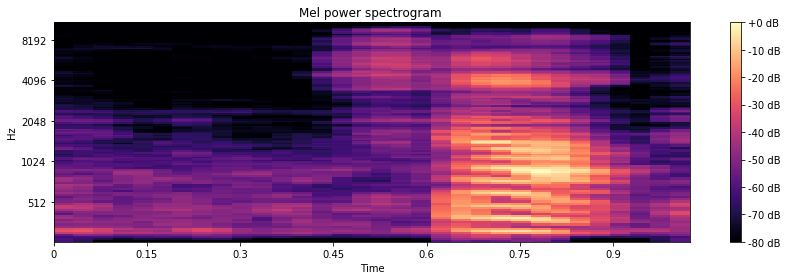

In [18]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=16000, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

In [19]:
def process_wavs(X, max_len = 16000, n_mels = 128):
    """Turns audio into a spectrogram, used on validation data"""
    x_spec = np.zeros((len(X), 128, 32, 1))
    for i, fn in enumerate(X):
        _, wave = scipy.io.wavfile.read(fn)
        wave = wave[:max_len]
        wave = np.pad(wave, (0, max_len-wave.shape[0]), 'minimum')
        S = librosa.feature.melspectrogram(wave, sr=16000, n_mels=n_mels)
        log_S = librosa.power_to_db(S, ref=np.max)
        x_spec[i,:,:,0] = log_S
    return x_spec

Learn parameters for normalization on ENTIRE training data before running the batches.

In [20]:
def process_wavs2(X, max_len = 16000, n_mels = 128):
    """Turns audio into a spectrogram, used on training data"""
    x_spec = np.zeros((len(X), 128, 32, 1))
    for i, wave in enumerate(X):
        wave = wave[:max_len]
        
        # makes sure we have consistent data, chops or pads.
        wave = np.pad(wave, (0, max_len-wave.shape[0]), 'minimum')
        S = librosa.feature.melspectrogram(wave, sr=16000, n_mels=n_mels)
        log_S = librosa.power_to_db(S, ref=np.max)
        x_spec[i,:,:,0] = log_S
    
    # TODO: normalize features 
#     x_shift = x_mfcc - (np.mean(x_mfcc, axis=1, keepdims=True) + 1e-8)
    
    return x_spec

In [25]:
train_df.sound[52110].shape

(16000,)

In [32]:
newx = process_wavs2(train_df.sound[52110:52120])

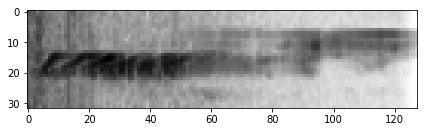

In [42]:
plt.figure(figsize=(7,7))
plt.imshow(newx[8,:,:,0].T, cmap='binary')

In [61]:
x_train_vec = process_wavs2(train_df.sound)
x_val_vec = process_wavs(valid_df.wav_file)

In [62]:
y_train_vec = train_df.label_id.as_matrix()
y_val_vec = valid_df.label_id.as_matrix()

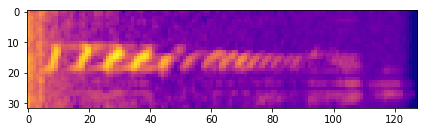

In [64]:
plt.figure(figsize=(7,7))
plt.imshow(x_train_vec[6,:,:,0].T, cmap='plasma')

In [65]:
for word_class in train_df.label_id.unique():
    print(word_class, train_df.label_id.value_counts()[word_class])

4 2106
10 36818
1 2105
6 2110
5 2111
3 2095
9 2112
0 2116
2 2115
8 2134
7 2101
11 3600


In [66]:
class_weight = {word_class: train_df.label_id.value_counts()[word_class] for word_class in train_df.label_id.unique()}

In [67]:
class_weight = {ind: len(train_df)/val for ind, val in class_weight.items()}

In [68]:
class_weight

{0: 29.075141776937617,
 1: 29.227078384798101,
 2: 29.088888888888889,
 3: 29.366587112171839,
 4: 29.213200379867047,
 5: 29.14400757934628,
 6: 29.15781990521327,
 7: 29.282722513089006,
 8: 28.829896907216494,
 9: 29.130208333333332,
 10: 1.6710033135966103,
 11: 17.089722222222221}

In [69]:
import keras
import keras.backend as K
# from keras.utils.vis_utils import model_to_dot
# from IPython.display import SVG
# import vis

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [70]:
num_labels = 12

In [71]:
train_df.label.value_counts()

unknown    36818
silence     3600
stop        2134
yes         2116
up          2115
go          2112
right       2111
on          2110
left        2106
no          2105
off         2101
down        2095
Name: label, dtype: int64

In [72]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

import random


In [73]:
x_train_vec[0].shape

(128, 32, 1)

In [75]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(128,32,1)),
    keras.layers.Conv2D(64, kernel_size=(20,8), strides=1, padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size=(10,4), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size=(5,2), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dropout(.4),
    keras.layers.Dense(250, activation="relu"),
    keras.layers.Dropout(.4),
    keras.layers.Dense(num_labels, activation="softmax")
])

model.compile(loss='sparse_categorical_crossentropy', 
               optimizer='nadam',
               metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 32, 1)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 32, 64)       10304     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 16, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 64, 16, 64)        256       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 16, 64)        163904    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 8, 64)         0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 8, 64)         256       
__________

In [76]:
from tensorflow.python.keras.callbacks import EarlyStopping

In [77]:
callbacks = [EarlyStopping(monitor='val_loss',
                           patience=5,
                           verbose=1,
                           min_delta=0.01,
                           mode='min')]

In [78]:
history = model.fit(x_train_vec, y_train_vec,
                              batch_size = 256,
                              epochs=50,
                              verbose=1, 
                              callbacks=callbacks,
                              validation_data=(x_val_vec, y_val_vec),
                              class_weight = class_weight)

Train on 61523 samples, validate on 6798 samples
Epoch 1/50
61523/61523 [==============================] - 97s 2ms/step - loss: 17.6314 - acc: 0.3833 - val_loss: 1.9444 - val_acc: 0.5243
Epoch 2/50
61523/61523 [==============================] - 91s 1ms/step - loss: 6.7479 - acc: 0.6992 - val_loss: 0.8898 - val_acc: 0.7118
Epoch 3/50
61523/61523 [==============================] - 91s 1ms/step - loss: 4.7327 - acc: 0.7887 - val_loss: 0.7653 - val_acc: 0.7474
Epoch 4/50
61523/61523 [==============================] - 91s 1ms/step - loss: 3.6037 - acc: 0.8367 - val_loss: 2.2435 - val_acc: 0.4544
Epoch 5/50
61523/61523 [==============================] - 91s 1ms/step - loss: 3.0236 - acc: 0.8601 - val_loss: 0.5173 - val_acc: 0.8379
Epoch 6/50
61523/61523 [==============================] - 90s 1ms/step - loss: 2.5726 - acc: 0.8819 - val_loss: 0.4262 - val_acc: 0.8698
Epoch 7/50
61523/61523 [==============================] - 90s 1ms/step - loss: 2.2428 - acc: 0.8925 - val_loss: 0.4625 - val_acc

In [79]:
y_val_pred = model.predict(x_val_vec)

In [80]:
y_val_pred[0]

array([  8.58943076e-06,   4.08974499e-09,   3.58739172e-08,
         8.30903080e-09,   9.98210549e-01,   3.82175926e-07,
         9.12427645e-09,   6.80424606e-08,   7.93476662e-09,
         2.64033396e-11,   1.78024941e-03,   2.12554844e-12], dtype=float32)

In [81]:
y_val_pred2 = np.array([np.argmax(pred) for pred in y_val_pred])

In [82]:
y_val_pred_label = np.vectorize(id2name.get)(y_val_pred2)

In [83]:
val_df = pd.Series(y_val_pred_label)

In [84]:
val_df.value_counts()

unknown    4042
right       329
no          308
up          283
off         283
on          273
down        270
left        259
yes         258
go          256
stop        237
dtype: int64

In [85]:
test_files = glob.glob('test/audio/*wav')

In [86]:
test_files[:10]

['test/audio/clip_bd6d0fb25.wav',
 'test/audio/clip_3e7a56353.wav',
 'test/audio/clip_c5884a6cb.wav',
 'test/audio/clip_ebf0d1f7b.wav',
 'test/audio/clip_2f714f052.wav',
 'test/audio/clip_05bfe5e6a.wav',
 'test/audio/clip_317b4a205.wav',
 'test/audio/clip_292983fee.wav',
 'test/audio/clip_e086bfc8e.wav',
 'test/audio/clip_d0d7fa566.wav']

In [87]:
x_test = process_wavs(test_files)

In [102]:
np.save('x_test_processed_dec2_melpower.npy', x_test)

In [49]:
# x_test = np.load('x_test_processed_dec2.npy')

In [88]:
x_test.shape

(158538, 128, 32, 1)

In [145]:
# np.save('x_test_processed', x_test)

In [89]:
y_test_pred = model.predict(x_test)

In [90]:
y_test_pred[1]

array([  8.86572980e-31,   7.58602090e-28,   5.84584743e-23,
         3.93925460e-21,   3.17911530e-26,   9.09257614e-23,
         1.00000000e+00,   5.47893865e-17,   1.19858986e-28,
         3.63230937e-20,   3.93065858e-11,   1.33844350e-38], dtype=float32)

In [91]:
y_test_pred2 = np.array([np.argmax(pred) for pred in y_test_pred])

In [92]:
y_test_pred2.shape

(158538,)

In [93]:
y_test_pred_label = np.vectorize(id2name.get)(y_test_pred2)

In [94]:
labels_df = pd.Series(y_test_pred_label)

In [95]:
labels_df.value_counts()

unknown    84393
off         8673
silence     8299
no          7917
right       7489
on          6906
left        6497
up          6349
stop        5855
yes         5553
down        5503
go          5104
dtype: int64

In [96]:
y_test_pred_label.shape

(158538,)

In [97]:
y_test_pred_label[:10]

array(['no', 'on', 'no', 'right', 'off', 'yes', 'right', 'silence', 'off',
       'unknown'],
      dtype='<U7')

In [98]:
test_files2 = [file.replace('test/audio/', "") for file in test_files]

In [99]:
test_files2[:10]

['clip_bd6d0fb25.wav',
 'clip_3e7a56353.wav',
 'clip_c5884a6cb.wav',
 'clip_ebf0d1f7b.wav',
 'clip_2f714f052.wav',
 'clip_05bfe5e6a.wav',
 'clip_317b4a205.wav',
 'clip_292983fee.wav',
 'clip_e086bfc8e.wav',
 'clip_d0d7fa566.wav']

In [100]:
with open('ccmm_submission_dec2_4.csv', 'w') as fout:
    fout.write('fname,label\n')
    for i in range(len(y_test_pred_label)):
        fout.write('{},{}\n'.format(test_files2[i], y_test_pred_label[i]))

In [101]:
model.save('model_dec2_3CNNs_melpower.h5')